In [1]:
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

# Make sure you have downloaded and installed FedScale
from fedscale.dataloaders.femnist import FEMNIST
from fedscale.dataloaders.utils_data import get_data_transform
from fedscale.dataloaders.divide_data import DataPartitioner
from fedscale.core.config_parser import args

In [2]:
train_transform, test_transform = get_data_transform('mnist')
train_dataset = FEMNIST('./benchmark/dataset/data/femnist', dataset='train', transform=train_transform)
test_dataset = FEMNIST('./benchmark/dataset/data/femnist', dataset='test', transform=test_transform)

In [3]:
args.task = 'cv'
training_sets = DataPartitioner(data=train_dataset, args=args, numOfClass=62)
training_sets.partition_data_helper(num_clients=None, data_map_file='./benchmark/dataset/data/femnist/client_data_mapping/train.csv')
#testing_sets = DataPartitioner(data=test_dataset, args=args, numOfClass=62, isTest=True)
#testing_sets.partition_data_helper(num_clients=None, data_map_file='./benchmark/dataset/data/femnist/client_data_mapping/train.csv')

In [4]:
print(f'Total number of data samples: {training_sets.getDataLen()}')
print(f'Total number of clients: {training_sets.getClientLen()}')

Total number of data samples: 637877
Total number of clients: 2800


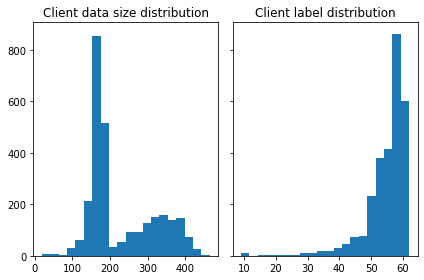

In [5]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
size_dist = training_sets.getSize()['size']

n_bins = 20
axs[0].hist(size_dist, bins=n_bins)
axs[0].set_title('Client data size distribution')

label_dist = training_sets.getClientLabel()
axs[1].hist(label_dist, bins=n_bins)
axs[1].set_title('Client label distribution')

plt.show()

In [6]:
rank=1
isTest = False
dropLast =  True
partition = training_sets.use(rank - 1, isTest)
num_loaders = min(int(len(partition)/ args.batch_size/2),  args.num_loaders)
dataloader = DataLoader(partition, batch_size=16, shuffle=True, pin_memory=True, timeout=60, num_workers=num_loaders, drop_last=dropLast)

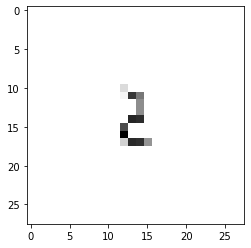

In [7]:
for data in iter(dataloader):
   plt.imshow(np.transpose(data[0][0].numpy(), (1, 2, 0)))
   break

In [3]:
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

# Make sure you have downloaded and installed FedScale
from fedscale.dataloaders.wisdm import WISDM
from fedscale.dataloaders.mhealth import MHEALTH
from fedscale.dataloaders.utils_data import get_data_transform
from fedscale.dataloaders.divide_data import DataPartitioner
from fedscale.core.config_parser import args

In [4]:
# train_transform, test_transform = get_data_transform('mnist')
train_dataset = MHEALTH('./benchmark/dataset/data/MHEALTH', dataset='train')
test_dataset = MHEALTH('./benchmark/dataset/data/MHEALTH', dataset='test')

In [7]:
args.task = 'har'
training_sets = DataPartitioner(data=train_dataset, args=args, numOfClass=13)
training_sets.partition_data_helper(num_clients=None, data_map_file='./benchmark/dataset/data/MHEALTH/client_data_mapping/train.csv')

In [8]:
print(f'Total number of data samples: {training_sets.getDataLen()}')
print(f'Total number of clients: {training_sets.getClientLen()}')

Total number of data samples: 97329
Total number of clients: 10


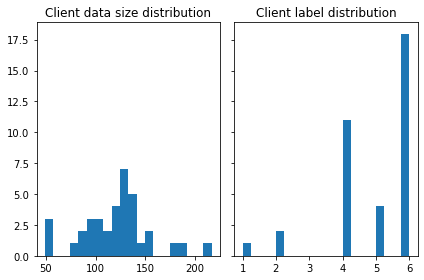

In [17]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
size_dist = training_sets.getSize()['size']

n_bins = 20
axs[0].hist(size_dist, bins=n_bins)
axs[0].set_title('Client data size distribution')

label_dist = training_sets.getClientLabel()
axs[1].hist(label_dist, bins=n_bins)
axs[1].set_title('Client label distribution')

plt.show()

In [18]:
rank=1
isTest = False
dropLast =  True
partition = training_sets.use(rank - 1, isTest)
num_loaders = min(int(len(partition)/ args.batch_size/2),  args.num_loaders)
dataloader = DataLoader(partition, batch_size=16, shuffle=True, pin_memory=True, timeout=60, num_workers=num_loaders, drop_last=dropLast)

In [21]:
for data in iter(dataloader):
   print(data[0][0])
   break

('0.0', '0.08', '0.11', '0.11', '0.14', '0.1', '0.12', '0.1', '0.19', '0.13', '0.21', '0.0', '0.08', '0.1', '0.0', '0.02')
